In [1]:
import pandas as pd
df=pd.read_csv('cinema.csv')
df.head(3)


,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [2]:
df.isnull().any(axis=0)

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

In [3]:
df2=df.fillna(df.mean())
df2.isnull().any(axis=0)

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

<Axes: xlabel='SNS2', ylabel='sales'>

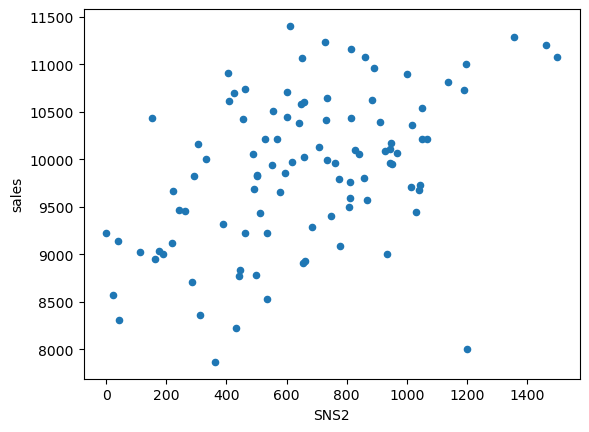

In [4]:
%matplotlib inline
df2.plot(kind='scatter',x='SNS2',y='sales')

<Axes: xlabel='original', ylabel='sales'>

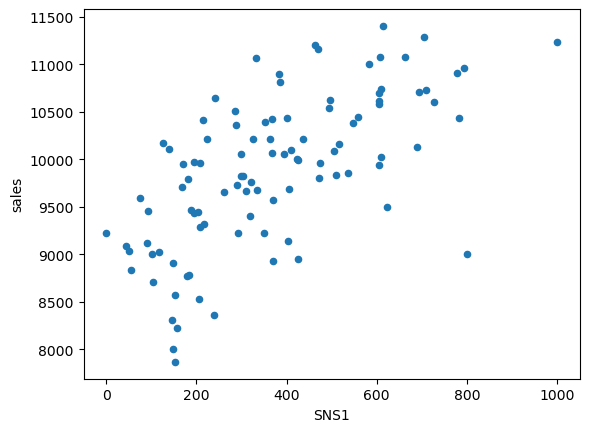

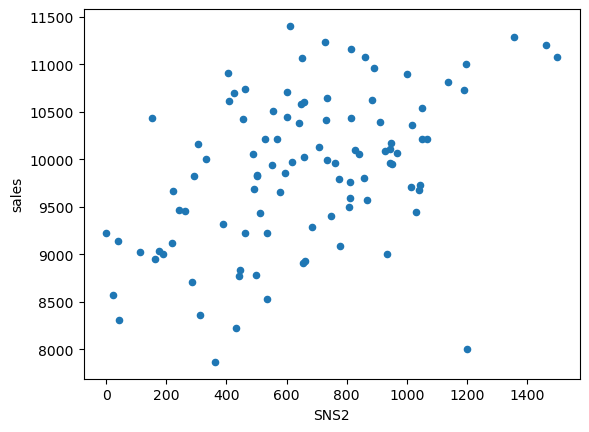

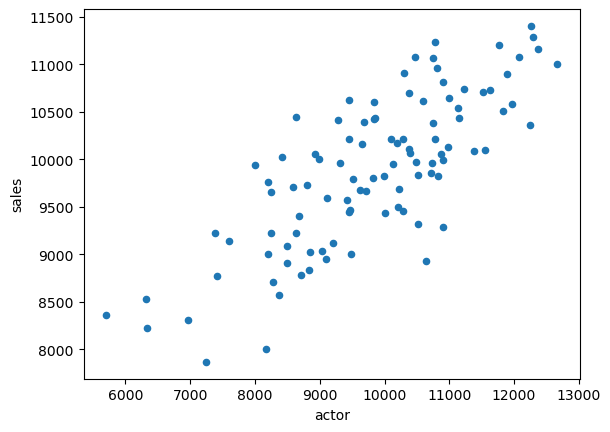

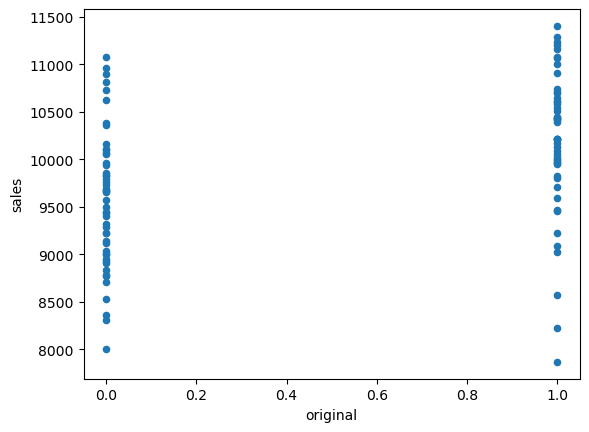

In [5]:
df2.plot(kind='scatter',x='SNS1',y='sales')
df2.plot(kind='scatter',x='SNS2',y='sales')
df2.plot(kind='scatter',x='actor',y='sales')
df2.plot(kind='scatter',x='original',y='sales')

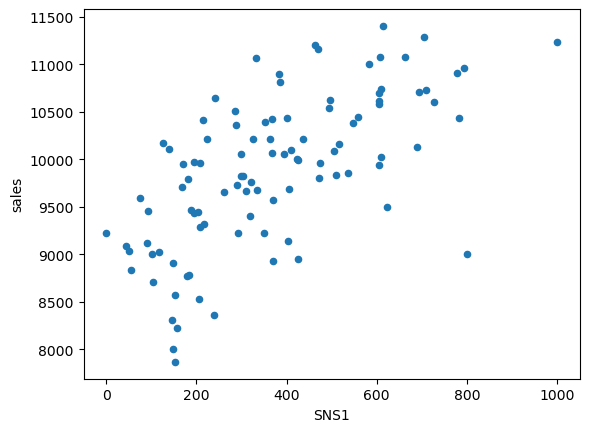

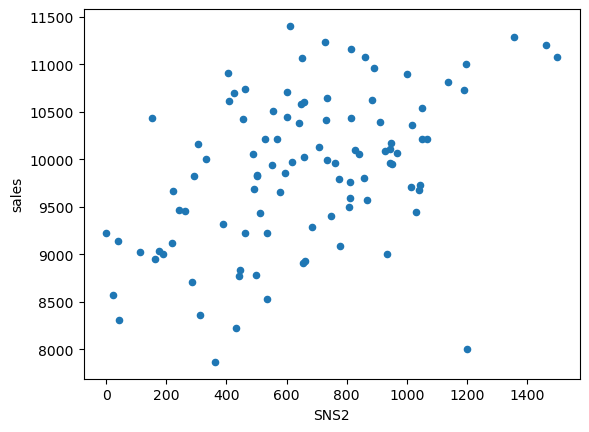

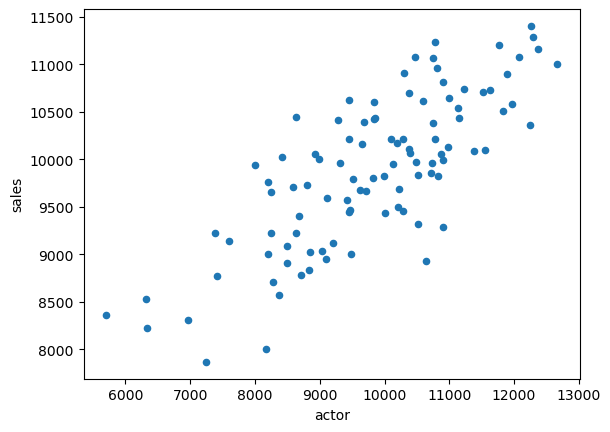

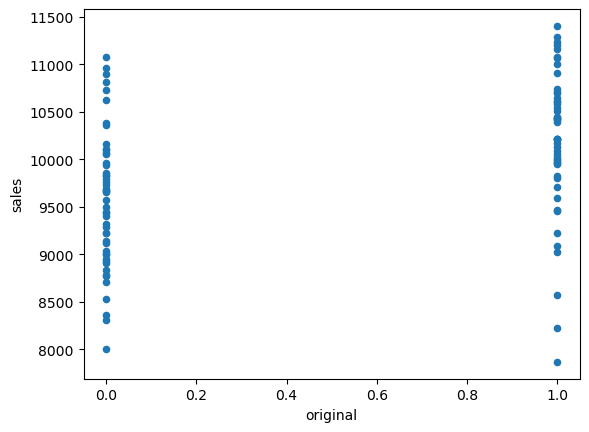

In [6]:
for name in df2.columns:
    if name=='cinema_id' or name == 'sales':
        continue
    df2.plot(kind='scatter',x=name,y='sales')

In [7]:
no=df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index
df3=df2.drop(no,axis=0)

In [8]:
test=pd.DataFrame({'Acolumn':[1,2,3],'Bcolumn':[4,5,6]})

In [9]:
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


In [10]:
test['Acolumn'] < 2

0     True
1    False
2    False
Name: Acolumn, dtype: bool

In [11]:
df[(df['SNS2'] > 1000) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [12]:
no=df2[(df['SNS2'] > 1000) & (df['sales'] < 8500)].index
no

Int64Index([30], dtype='int64')

In [13]:
test.drop(0, axis=0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [14]:
test.drop('Bcolumn', axis=1)

,Acolumn
0,1
1,2
2,3


In [15]:
df3=df2.drop(no,axis=0)
df3.shape

(99, 6)

In [17]:
col=['SNS1','SNS2','actor','original']
x=df3[col]
t=df3['sales']

In [18]:
df3.loc[2,'SNS1']

158.0

In [20]:
index=[2,4,6]
col=['SNS1','actor']
df3.loc[index,col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [21]:
df3.loc[2,'SNS1']

158.0

In [23]:
index=[2,4,6]
col=['SNS1','actor']
df3.loc[index,col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [24]:
sample=[10,20,30,40]
sample[1:3]

[20, 30]

In [25]:
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [26]:
x=df3.loc[:, 'SNS1':'original']
t=df3['sales']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
new=[[150,700,300,0]]
model.predict(new)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6874.109753])

In [33]:
new=[[150,700,300,1]]
model.predict(new)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7088.06559802])

In [34]:
model.score(x_test,y_test)

0.7903881596570089

In [35]:
from sklearn.metrics import mean_absolute_error
pred=model.predict(x_test)
mean_absolute_error(y_pred=pred,y_true=y_test)

277.12236964086253

In [36]:
model.score(x_test,y_test)

0.7903881596570089

In [37]:
import pickle
with open('cinema.pkl','wb')as f:
    pickle.dump(model, f)

In [38]:
print(model.coef_)
print(model.intercept_)

[  1.07645622   0.53400191   0.28473752 213.95584503]
6253.418729438712


In [39]:
tmp=pd.DataFrame(model.coef_)
tmp.index=x_train.columns
tmp

,0
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845
